# Tests on explainability

Fist part we are getting the keras model made by Shanekonaung on the Boston Housing dataset: https://www.kaggle.com/shanekonaung/boston-housing-price-dataset-with-keras
The notebook describe how I've work through the project, I've put usefull functions at the end :)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from keras.datasets import boston_housing

(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()
labels = ['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

Using TensorFlow backend.


In [3]:
mean = train_data.mean(axis=0)
train_data -= mean
std = train_data.std(axis=0)
train_data /= std

test_data -= mean
test_data /= std

In [4]:
from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

In [5]:
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

102/102 [==============================] - 0s 1ms/step


In [6]:
test_mae_score,test_mse_score

(2.6949939727783203, 20.740324730966606)

## Beginning of Experiments

#### We begin by experimenting on a sigle individual

In [7]:
#We define what will be the epsilon used to calculate the derivative
epsilon = 0.01

In [8]:
#prediction of individual 0
base_pred = model.predict(np.array([test_data[0,:]]))

In [9]:
#For each feature we add epsilon and predict the result (in new_preds_pos)
new_preds = []
for i, feat in enumerate(np.array(test_data[0,:])):
    tmp = np.copy(test_data[0,:])
    np.put(tmp, i, feat+epsilon)
    new_preds.append(model.predict(np.array([tmp])))

In [10]:
#We can now calculate the derivatives based on normalized features
derivatives = (new_preds-base_pred)/epsilon

In [11]:
#Let's visualize them :
for i, der in enumerate(derivatives):
    print(f'derivative of the feature {i} on individual zero is {np.around(der[:,0],decimals=2)} ')

derivative of the feature 0 on individual zero is [-1.16] 
derivative of the feature 1 on individual zero is [-1.02] 
derivative of the feature 2 on individual zero is [0.58] 
derivative of the feature 3 on individual zero is [-0.74] 
derivative of the feature 4 on individual zero is [-1.41] 
derivative of the feature 5 on individual zero is [-0.99] 
derivative of the feature 6 on individual zero is [0.92] 
derivative of the feature 7 on individual zero is [-2.44] 
derivative of the feature 8 on individual zero is [2.34] 
derivative of the feature 9 on individual zero is [1.55] 
derivative of the feature 10 on individual zero is [0.6] 
derivative of the feature 11 on individual zero is [-0.72] 
derivative of the feature 12 on individual zero is [-1.84] 


We can change the individual which is studied :

In [12]:
indiv = 1

In [13]:
#We define what will be the epsilon used to calculate the derivative
epsilon = 0.01

In [14]:
#prediction of individual 'indiv'
base_pred = model.predict(np.array([test_data[indiv,:]]))

In [15]:
#For each feature we add epsilon and predict the result
new_preds = []
for i, feat in enumerate(np.array(test_data[indiv,:])):
    tmp = np.copy(test_data[indiv,:])
    np.put(tmp, i, feat+epsilon)
    new_preds.append(model.predict(np.array([tmp])))

In [16]:
#We cannow calculate the derivatives
derivatives = (new_preds-base_pred)/epsilon

In [17]:
#Let's visualize them :
for i, der in enumerate(derivatives):
    print(f'derivative of the feature {i} on individual {indiv} is  {np.around(der[:,0],decimals=2)} ')

derivative of the feature 0 on individual 1 is  [-8.72] 
derivative of the feature 1 on individual 1 is  [-4.51] 
derivative of the feature 2 on individual 1 is  [-0.8] 
derivative of the feature 3 on individual 1 is  [-3.02] 
derivative of the feature 4 on individual 1 is  [-5.09] 
derivative of the feature 5 on individual 1 is  [-0.27] 
derivative of the feature 6 on individual 1 is  [-0.23] 
derivative of the feature 7 on individual 1 is  [-5.76] 
derivative of the feature 8 on individual 1 is  [2.11] 
derivative of the feature 9 on individual 1 is  [-1.06] 
derivative of the feature 10 on individual 1 is  [-0.91] 
derivative of the feature 11 on individual 1 is  [2.78] 
derivative of the feature 12 on individual 1 is  [-2.37] 


### We will compute the derivative by retracting epsilon instead of adding it, in order to have a better approximation of the derivative

In [18]:
indiv = 9
epsilon = 0.01

base_pred = model.predict(np.array([test_data[indiv,:]]))

new_preds_pos = []
new_preds_neg = []
for i, feat in enumerate(np.array(test_data[indiv,:])):
    tmp = np.copy(test_data[indiv,:])
    np.put(tmp, i, feat+epsilon)
    new_preds_pos.append(model.predict(np.array([tmp])))
    np.put(tmp, i, feat-epsilon)
    new_preds_neg.append(model.predict(np.array([tmp])))
    
new_preds_pos = np.array(new_preds_pos)
new_preds_neg = np.array(new_preds_neg)
    
derivatives = (((new_preds_pos-base_pred)-(new_preds_neg-base_pred))/2)/epsilon

for i, der in enumerate(derivatives):
    print(f'derivative of the feature {i} on individual {indiv} is  {np.around(der[:,0],decimals=2)} ')

derivative of the feature 0 on individual 9 is  [-5.35] 
derivative of the feature 1 on individual 9 is  [-3.32] 
derivative of the feature 2 on individual 9 is  [0.43] 
derivative of the feature 3 on individual 9 is  [-1.62] 
derivative of the feature 4 on individual 9 is  [-4.28] 
derivative of the feature 5 on individual 9 is  [0.99] 
derivative of the feature 6 on individual 9 is  [1.24] 
derivative of the feature 7 on individual 9 is  [-8.57] 
derivative of the feature 8 on individual 9 is  [5.57] 
derivative of the feature 9 on individual 9 is  [1.15] 
derivative of the feature 10 on individual 9 is  [0.95] 
derivative of the feature 11 on individual 9 is  [2.47] 
derivative of the feature 12 on individual 9 is  [-10.8] 


### Let's try to give a visual representation of an individual

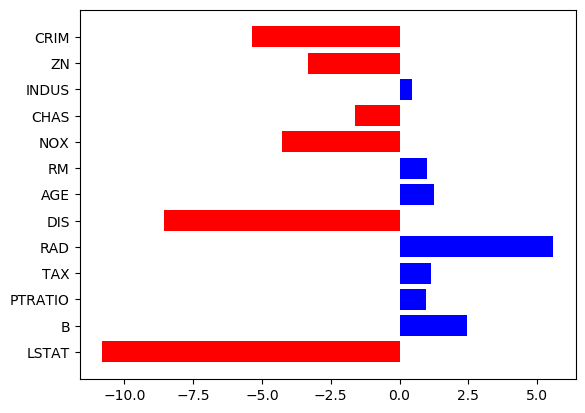

In [19]:
indiv = 1
color = []
for i in derivatives[:,0][:,0]:
    if i > 0:
        color.append('blue')
    else:
        color.append('red')

plt.rcdefaults()
fig, ax = plt.subplots()
y_pos = np.arange(len(labels))
ax.barh(y_pos, derivatives[:,0][:,0], align='center',color=color)
ax.set_yticks(y_pos)
ax.set_yticklabels(labels)
ax.invert_yaxis()
plt.show()
#fig.savefig('result_explainability.png')

We are intersted to see if training the same model with the same data leads to the same chart every time

102/102 [==============================] - 0s 823us/step


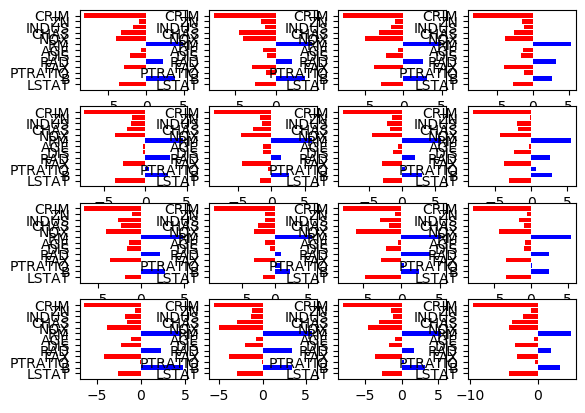

In [20]:
indiv = 7
epsilon = 0.01

fig, axs = plt.subplots(4,4)

for a in range (4):
    for b in range (4):

        model = build_model()
        model.fit(train_data, train_targets, epochs=100, batch_size=16, verbose=0)
        test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

        base_pred = model.predict(np.array([test_data[indiv,:]]))

        new_preds_pos = []
        new_preds_neg = []
        for i, feat in enumerate(np.array(test_data[indiv,:])):
            tmp = np.copy(test_data[indiv,:])
            np.put(tmp, i, feat+epsilon)
            new_preds_pos.append(model.predict(np.array([tmp])))
            np.put(tmp, i, feat-epsilon)
            new_preds_neg.append(model.predict(np.array([tmp])))

        new_preds_pos = np.array(new_preds_pos)
        new_preds_neg = np.array(new_preds_neg)

        derivatives = (((new_preds_pos-base_pred)-(new_preds_neg-base_pred))/2)/epsilon

        color = []
        for i in derivatives[:,0][:,0]:
            if i > 0:
                color.append('blue')
            else:
                color.append('red')

        y_pos = np.arange(len(labels))
        axs[int(a),int(b)].barh(y_pos, derivatives[:,0][:,0], align='center',color=color)
        axs[int(a),int(b)].set_yticks(y_pos)
        axs[int(a),int(b)].set_yticklabels(labels)
        axs[int(a),int(b)].invert_yaxis()

plt.show()


The results are not identical, but it is normal because the model are not the same (even if they have the same architecture and training). However we can see that even with different models the features have almost the same weights.

# Usefull Functions

In [21]:
def get_derivatives(model, indiv, epsilon=0.01):
    base_pred = model.predict(np.array([indiv]))

    new_preds_pos = []
    new_preds_neg = []
    for i, feat in enumerate(np.array(indiv)):
        tmp = np.copy(indiv)
        np.put(tmp, i, feat+epsilon)
        new_preds_pos.append(model.predict(np.array([tmp])))
        np.put(tmp, i, feat-epsilon)
        new_preds_neg.append(model.predict(np.array([tmp])))

    new_preds_pos = np.array(new_preds_pos)
    new_preds_neg = np.array(new_preds_neg)

    return ((((new_preds_pos-base_pred)-(new_preds_neg-base_pred))/2)/epsilon)[:,0][:,0]

In [22]:
def plot_derivatives(derivatives, labels, save_name=None):
    color = []
    for i in derivatives:
        if i > 0:
            color.append('blue')
        else:
            color.append('red')

    plt.rcdefaults()
    fig, ax = plt.subplots()
    y_pos = np.arange(len(labels))
    ax.barh(y_pos, derivatives, align='center',color=color)
    ax.set_yticks(y_pos)
    ax.set_yticklabels(labels)
    ax.invert_yaxis()
    plt.show()
    if (save_name!=None):
        fig.savefig(str(save_name)+'.png')


### Example

[-5.456543   -1.0803223  -1.5380859  -2.0202637  -2.7526855   1.4587402
  0.7080078  -3.881836    2.5024414  -0.2746582  -0.53100586  3.9733887
 -5.2124023 ]


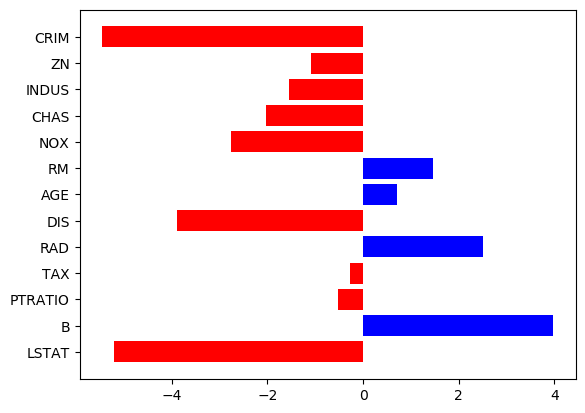

In [23]:
test = np.array([0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33])
deri = get_derivatives(model,test)
print(deri)
plot_derivatives(deri, labels)